# Multivariate Linear Regression
***

In this notebook I'm showing the implementation of Multivariate Linear Regression (or Linear Regression with multiple variables/features).

Steps to get it done
In order:

* import necessary libraries;
* read the dataset and create a NumPy array from it;
* separate X (variable) and Y (label) and initialize m;
* add bias to the X variable;
* initialize theta as [0, 0];
* implement Cost Function;
* initialize number of iterations as 1500;
* initialize learning rate as 0.01;
* implement Gradient Descent;
* train the model using X, y and theta;
* calculate some predictions using the proper theta;
* plot the training examples and fit the regression line;
* (optional) generate a plot of the Cost Function

### Needed libraries
The implementation can be done without using pandas, but for the sake of readability, I'm using it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading the dataset and converting to NumPy array

In [2]:
dataset = pd.read_csv('data.txt', sep=",", header=None, names=["size_sqf", "number_bedrooms", "price"])
dataset = dataset.to_numpy()

### Separating feature from label

In [3]:
# Separating X and y

X = dataset[:, :-1]
y = dataset[:, -1:]

# Initializing m

m = len(y)

### Implementing Feature Normalization 

In [4]:
# mu = mean(X);
# sigma = std(X);
# m = size(X,1);
# mu_matrix = ones(m,1) * mu;
# sigma_matrix = ones(m,1) * sigma;

# X_norm = ((X - mu_matrix) ./ sigma_matrix);


def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return mu, sigma, X_norm
    
mu, sigma, X = featureNormalize(X)
X = np.concatenate((np.ones((m, 1), dtype=np.int8), X), axis=1)

### Implementing Cost Function

In [5]:
def computeCost(X, y, theta):
    J = 0
    hypothesis_func = np.dot(X, theta)
    sqr_errors = np.power((hypothesis_func - y), 2)
    J = (1 /(2 * m)) * np.sum(sqr_errors)
    return J

### Implementing Gradient Descent

In [6]:
# Initializing iterations and learning rate

iterations = 400;
learning_rate = 0.01;

In [7]:
def gradientDescent(X, y, theta, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations, 2))
    
    for iteration in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_hist[iteration] = computeCost(X, y, theta)
        
    return theta, cost_hist

### Training The Model

In [8]:
# Getting the values of theta, cost function values and theta values over iterations
theta = np.zeros((3,1))
theta, cost_values = gradientDescent(X, y, theta, learning_rate, iterations)

### Plotting the training examples and linear regression plot line

In [9]:
# Defining the style of the plots

plt.style.use('seaborn-whitegrid')

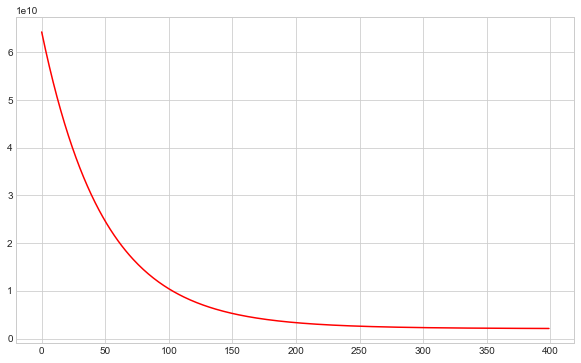

In [10]:
# Plotting the dataset and linear regression line

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cost_values, '-', c="red")
plt.show()

In [11]:
mu[0]

2000.6808510638298

In [12]:
sigma[0]

786.2026187430467

In [16]:
temp = np.array([[1, 1650, 3]], dtype='f')
a = (temp[0][1] - mu[0]) / sigma[0]
b = (temp[0][2] - mu[1]) / sigma[1]
temp[0, 1] = a
temp[0, 2] = b
a, b

(-0.4460438603276164, -0.2260933675776883)

In [17]:
temp

array([[ 1.        , -0.44604385, -0.22609337]], dtype=float32)

In [15]:
(temp[0][1] - mu[0]) / sigma[0]

-2.544739490008884